### Fifty Challenging Problems in Probability 


<p align="left">
    <img src="images/problem1.png" width="950" />
</p>

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import time

1. We will create a function to simulate the experiment n_trials times and count how often two red socks are drawn. In each experiment we have num_r red socks and num_b black socks. We draw two socks without replacement and if they are both red we increment the count. We repeat the experiment sample_size times and add the ratio to the list_ratios. We repeat the process n_trials times to get the variance of the ratio.

In [59]:
def run_trials(n_trials, n_samples, num_r, num_b, verbose=True):
    """
    Simulates drawing two socks multiple times from a drawer containing 'num_r' red socks and 'num_b' black socks.
    
    Args:
        n_trials (int): The number of trial runs to repeat the experiment.
        sample_size (int): The number of samples drawn in each trial.
        num_r (int): The number of red socks in the drawer.
        num_b (int): The number of black socks in the drawer.
        verbose (bool): If True, prints the results after the trials are completed. Default is True.
    
    Returns:
        prob_mean (float): The mean probability of drawing two red socks across all trials.
        prob_se (float): The standard error of the mean probability across trials.
        list_ratios (numpy.ndarray): Array of probabilities of drawing two red socks for each trial.
    """
    
    list_ratios = []
    
    for i in range(n_trials):
        count = 0  # Count of successful draws (i.e., two red socks)
        
        for j in range(n_samples):
            # Randomly sample two socks from the drawer without replacement
            pick_two_socks = random.sample(['R', 'B'], k=2, counts=[num_r, num_b])
            
            # Check if both socks drawn are red
            if pick_two_socks.count('R') == 2:
                count += 1
        
        # Calculate the ratio of successful draws (two red socks) in this trial
        ratio = count / n_samples
        list_ratios.append(ratio)
    
    # Convert list of ratios to a numpy array for statistical analysis
    list_ratios = np.array(list_ratios)
    
    if verbose:
        print("The probability of drawing two red socks is: ", round(list_ratios.mean(), 5))
        print("The standard error is: ", round(list_ratios.std() / np.sqrt(n_trials), 5))
    
    # Calculate and return the mean probability and its standard error
    prob_mean = list_ratios.mean()
    prob_se = list_ratios.std() / np.sqrt(n_trials)
    
    return prob_mean, prob_se, list_ratios


Let's see what is the probability of drawing two red socks when there are 3 red and 1 black sock in the drawer

In [61]:
n_trials = 1000
n_samples = 10000
num_r = 3
num_b = 1   

start_time = time.time()

_,_,list_ratios = run_trials(n_trials=n_trials, n_samples =n_samples, num_r=num_r, num_b=num_b)

end_time = time.time()
print(f"\nTime taken for {n_trials} trials and {n_samples} samples: {end_time - start_time:.2f} seconds")

The probability of drawing two red socks is:  0.50016
The standard error is:  0.00016

Time taken for 1000 trials and 10000 samples: 14.96 seconds


As the sample size and number of trials increase, the standard error decreases. It is essential to optimize the speed of the analysis. The function can be further enhanced by utilizing precalculated probabilities and vectorized operations to improve efficiency. The run_trials function is improved below:

In [6]:
def run_trials_optimized(n_trials, n_samples, num_r, num_b, verbose=True):
    """
    Simulates drawing two socks multiple times from a drawer containing 'num_r' red socks and 'num_b' black socks.
    
    Optimized version using NumPy for faster performance.
    
    Args:
        n_trials (int): The number of trial runs to repeat the experiment.
        sample_size (int): The number of samples drawn in each trial.
        num_r (int): The number of red socks in the drawer.
        num_b (int): The number of black socks in the drawer.
        verbose (bool): If True, prints the results after the trials are completed. Default is True.
    
    Returns:
        prob_mean (float): The mean probability of drawing two red socks across all trials.
        prob_se (float): The standard error of the mean probability across trials.
        list_ratios (numpy.ndarray): Array of probabilities of drawing two red socks for each trial.
    """
    
    total_socks = num_r + num_b
    
    # Probability of drawing a red sock first
    prob_first_red = num_r / total_socks
    
    # Probability of drawing a red sock second, given the first was red
    prob_second_red_given_first_red = (num_r - 1) / (total_socks - 1)
    
    # Probability of drawing two red socks
    prob_two_red = prob_first_red * prob_second_red_given_first_red
    
    # Simulate the trials
    draws = np.random.rand(n_trials, sample_size) < prob_two_red
    
    # Count successful draws
    successes = np.sum(draws, axis=1)
    
    # Calculate ratios
    list_ratios = successes / sample_size
    
    prob_mean = np.mean(list_ratios)
    prob_se = np.std(list_ratios, ddof=1) / np.sqrt(n_trials)
    
    if verbose:
        print(f"The probability of drawing two red socks is: {prob_mean:.5f}")
        print(f"The standard error is: {prob_se:.5f}")
    
    return prob_mean, prob_se, list_ratios

In [89]:
# check the time it takes to run the function

n_trials = 10000
sample_size = 100000
num_r = 3
num_b = 1   

start_time = time.time()

_,_,list_ratios_optimized = run_trials_optimized(n_trials=n_trials, sample_size=sample_size, num_r=num_r, num_b=num_b)

end_time = time.time()
print(f"\nTime taken for {n_trials} trials and {sample_size} samples: {end_time - start_time:.2f} seconds")


The probability of drawing two red socks is: 0.50000
The standard error is: 0.00002

Time taken for 10000 trials and 100000 samples: 6.86 seconds


We see that with the optimized function we are able to conduct 100 times more experiments in half the time. This leads to a quite lower standard error, thus more accurate results. Next we will plot a histogram of for the two cases and we will see visually that due to the larger number of experiments the distribution is more concentrated around the true probability

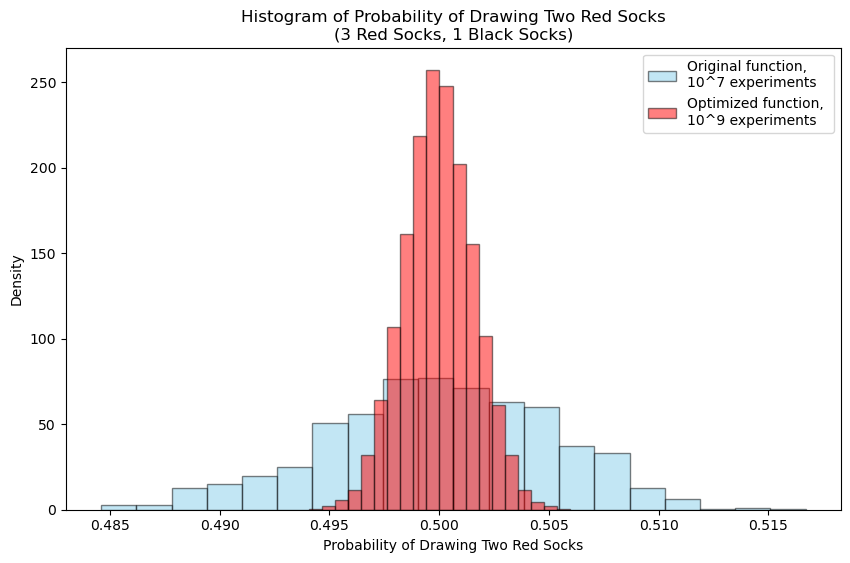

In [12]:
def plot_histogram(list_ratios, list_ratios_optimized, num_r, num_b):
    """
    Plots a histogram of the list of ratios of successful draws (two red socks) in the trials.
    
    Args:
        list_ratios (numpy.ndarray): A numpy array containing the ratios of successful draws in each trial.
        list_ratios_optimized (numpy.ndarray): A numpy array containing the ratios of successful draws in each trial for the optimized method.
        num_r (int): The number of red socks in the drawer.
        num_b (int): The number of black socks in the drawer.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(list_ratios, bins=20, color='skyblue', edgecolor='black', alpha=0.5, density=True)
    plt.hist(list_ratios_optimized, bins=20, color='red', edgecolor='black', alpha=0.5, density=True)
    
    plt.xlabel('Probability of Drawing Two Red Socks')
    plt.ylabel('Density')
    plt.title(f'Histogram of Probability of Drawing Two Red Socks\n({num_r} Red Socks, {num_b} Black Socks)')
    plt.legend(['Original function, \n10^7 experiments', 'Optimized function, \n10^9 experiments'])
    plt.show()
    
# Assuming list_ratios_optimized is available
plot_histogram(list_ratios, list_ratios_optimized, num_r=3, num_b=1)

We will now define a function that incrementally increases the number of socks and checks if the mean probability equals the target value (e.g., 0.5). It calculates the 95% confidence interval based on the results from the run_trials function

In [38]:
def min_socks(list_red, list_black, n_trials=1000, sample_size=10000, prob=0.5, tol=0.001, verbose=True):
    """
    Determines the minimum number of red and black socks that yield a target probability of drawing two red socks.
    
    Args:
        list_red (list): A list of potential numbers of red socks.
        list_black (list): A list of potential numbers of black socks.
        n_trials (int): The number of trials to run for each combination.
        sample_size (int): The number of samples drawn per trial. 
        prob (float): The target probability of drawing two red socks. Default is 0.5.
        tol (float): The maximum allowed width of the 95% confidence interval. Default is 0.001.
        verbose (bool): If True, prints progress and results. Default is True.
    
    Returns:
        tuple: The minimum number of red and black socks that result in the target probability.
    """
    
    count = 0  # Track how many valid combinations meet the probability requirement
    min_pair = (len(list_red), len(list_black))  # Initialize minimum pair with max possible values
    
    for num_r in list_red:
        for num_b in list_black:
            # Run trials and obtain the mean probability and standard error
            prob_mean, prob_se, _ = run_trials_optimized(n_trials, sample_size, num_r, num_b, verbose=False)
            
            # Calculate the 95% confidence interval width
            ci_width = 2 * 1.96 * prob_se
                    
            # Check if the target probability falls within the confidence interval of the estimated mean
            if prob_mean - 1.96 * prob_se <= prob <= prob_mean + 1.96 * prob_se:
                if ci_width > tol:
                    if verbose:
                        print(f'The confidence interval width ({ci_width:.5f}) is wider than the tolerance ({tol}).')
                        print('Consider increasing the number of trials or the sample size.')
                else:
                    count += 1
                    # Update the minimum pair if this combination has fewer socks
                    if num_r + num_b < min_pair[0] + min_pair[1]:
                        min_pair = (num_r, num_b)
                    if verbose:
                        print(f'Red socks: {num_r}, Black socks: {num_b}')
                        print(f'Probability: {prob_mean:.5f}, SE: {prob_se:.5f}, CI width: {ci_width:.5f} \n')

     
    if count > 0:
        print(f'\nThe minimum number of socks that give a probability of {prob} is: {min_pair[0]+min_pair[1]}, with {min_pair[0]} red socks and {min_pair[1]} black socks')           
    else:
        print('No combination of socks resulted in the target probability.')



#### Part a)

We will search for the minimum number of red and black socks that give a probability of 0.5. We will start with the range of 1 to 10 for both red and black socks.

In [39]:
list_red = list(range(1,10))
list_black = list(range(1,10))

min_socks(list_red,list_black)

Red socks: 3, Black socks: 1
Probability: 0.49977, SE: 0.00016, CI width: 0.00063 


The minimum number of socks that give a probability of 0.5 is: 4, with 3 red socks and 1 black socks


#### Part b)

Since the number of black socks is even, we will define the list_black accordingly

In [40]:
list_red = list(range(1,20))
list_black = list(range(2,20,2))

min_socks(list_red,list_black)

Red socks: 15, Black socks: 6
Probability: 0.50015, SE: 0.00016, CI width: 0.00062 


The minimum number of socks that give a probability of 0.5 is: 21, with 15 red socks and 6 black socks


The above results are matching with the ones in the book. 